In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [44]:
dataset = pd.read_csv('/content/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
X = pd.get_dummies(data=dataset, columns=['State'])
Y = dataset['Profit']

In [53]:
X.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [55]:
Y_test.shape

(10,)

In [58]:
reg = Lasso(alpha=20,normalize=True,max_iter=100)
model = reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)

In [59]:
model.score(X_test,Y_test)

0.9999845993510121

In [61]:
reg2 = Ridge(alpha=20,normalize=True)
model = reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)
model.score(X_test,Y_test)

0.9999845993510121

Text(0, 0.5, 'Predictions')

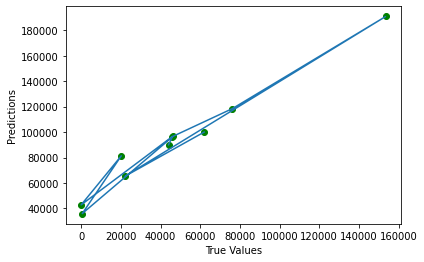

In [66]:
import matplotlib.pyplot as plt

plt.scatter(X_test['R&D Spend'],Y_test,color= 'green')
plt.plot(X_test['R&D Spend'],reg.predict(X_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

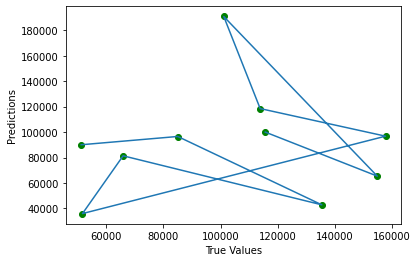

In [67]:
plt.scatter(X_test['Administration'],Y_test,color= 'green')
plt.plot(X_test['Administration'], model.predict(X_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')